In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load and split data

In [3]:
# Load data
data = pd.read_csv('data/HR_data.csv')
data.head()

,Unnamed: 0,HR_TD_Mean,HR_TD_Median,HR_TD_std,HR_TD_Min,HR_TD_Max,HR_TD_AUC,HR_TD_Kurtosis,HR_TD_Skew,HR_TD_Slope_min,...,upset,hostile,alert,ashamed,inspired,nervous,attentive,afraid,active,determined
0,0,78.663878,76.70,7.480043,67.25,92.48,23048.450,-1.091448,0.369955,-0.7300,...,1.0,1.0,2.0,1.0,2.0,2.0,3.0,1.0,2.0,2.0
1,1,76.540732,76.61,2.584756,69.82,82.33,23959.920,-0.245338,0.338732,-0.3600,...,2.0,1.0,3.0,2.0,2.0,2.0,3.0,1.0,3.0,3.0
2,2,78.173563,77.92,2.681255,72.22,82.80,20324.605,-0.615922,-0.233047,-0.6300,...,1.0,1.0,2.0,1.0,3.0,2.0,3.0,2.0,3.0,3.0
3,3,83.073688,83.88,7.363598,69.42,96.12,24924.300,-0.866610,-0.046021,-0.4650,...,1.0,1.0,2.0,1.0,3.0,2.0,3.0,2.0,3.0,3.0
4,4,72.281250,72.91,3.193762,64.95,79.98,23052.100,0.200401,-0.560948,-0.3725,...,3.0,1.0,3.0,2.0,3.0,3.0,4.0,2.0,4.0,4.0


In [4]:
data.columns

Index(['Unnamed: 0', 'HR_TD_Mean', 'HR_TD_Median', 'HR_TD_std', 'HR_TD_Min',
       'HR_TD_Max', 'HR_TD_AUC', 'HR_TD_Kurtosis', 'HR_TD_Skew',
       'HR_TD_Slope_min', 'HR_TD_Slope_max', 'HR_TD_Slope_mean', 'HR_TD_Slope',
       'TEMP_TD_Mean', 'TEMP_TD_Median', 'TEMP_TD_std', 'TEMP_TD_Min',
       'TEMP_TD_Max', 'TEMP_TD_AUC', 'TEMP_TD_Kurtosis', 'TEMP_TD_Skew',
       'TEMP_TD_Slope_min', 'TEMP_TD_Slope_max', 'TEMP_TD_Slope_mean',
       'TEMP_TD_Slope', 'EDA_TD_P_Mean', 'EDA_TD_P_Median', 'EDA_TD_P_std',
       'EDA_TD_P_Min', 'EDA_TD_P_Max', 'EDA_TD_P_AUC', 'EDA_TD_P_Kurtosis',
       'EDA_TD_P_Skew', 'EDA_TD_P_Slope_min', 'EDA_TD_P_Slope_max',
       'EDA_TD_P_Slope_mean', 'EDA_TD_P_Slope', 'EDA_TD_T_Mean',
       'EDA_TD_T_Median', 'EDA_TD_T_std', 'EDA_TD_T_Min', 'EDA_TD_T_Max',
       'EDA_TD_T_AUC', 'EDA_TD_T_Kurtosis', 'EDA_TD_T_Skew',
       'EDA_TD_T_Slope_min', 'EDA_TD_T_Slope_max', 'EDA_TD_T_Slope_mean',
       'EDA_TD_T_Slope', 'EDA_TD_P_Peaks', 'EDA_TD_P_RT', 'EDA_TD_P_R

In [5]:
# Remoce the first column
data = data.drop(columns=['Unnamed: 0'])

In [ ]:
id_columns = ['Round', 'Phase', 'Individual', 'Puzzler', 'Cohort']

In [7]:
# Extract questionnaire data
questionnaire = data[[col for col in data.columns if 'EDA_' not in col if 'TEMP_' not in col if 'HR_' not in col]].copy()

# Extract numerical data
numerical = data[[col for col in data.columns if 'EDA_' in col or 'TEMP_' in col or 'HR_' in col or col in col in id_columns ]].copy()

In [8]:
# Extract individual time domain signal measures
heart_rate = pd.concat([data[id_columns], data[[col for col in data.columns if 'HR_TD_' in col]]], axis=1)
temperature = pd.concat([data[id_columns], data[[col for col in data.columns if 'TEMP_TD_' in col]]], axis=1)
eda_phasic = pd.concat([data[id_columns], data[[col for col in data.columns if 'EDA_TD_P_' in col]]], axis=1)
# ^ also has reaction tie, peaks, and rise time
eda_tonic = pd.concat([data[id_columns], data[[col for col in data.columns if 'EDA_TD_T_' in col]]], axis=1)

# Prelim analysis

In [90]:
# Generate histograms
def hist_subplots(dataset, id_columns, fig=None):

    # Get relevant features
    rel_features = [col for col in dataset.columns if col not in id_columns]

    # Plot distribution of each feature -- EXACT SAME from bia!!!
    if fig is None:
        fig = plt.figure(figsize=(20, 40))
    for i, col in enumerate(rel_features):
        plt.subplot(15, 4, i + 1)
        sns.histplot(dataset[col], kde=True)
        plt.title(col)
    plt.tight_layout()
    plt.show()

In [66]:
# Generate correlation matrix
def corr_heatmap(dataset, id_columns):

    # Get relevant features
    rel_features = [col for col in dataset.columns if col not in id_columns]

    # Subset with only relevant features
    subset = dataset[rel_features]

    # Triangular correlation matrix
    mask = np.triu(np.ones_like(subset.corr(), dtype=np.bool))

    # Correlation heatmap
    plt.figure(figsize=(7, 5))
    sns.heatmap(subset.corr(), mask=mask, annot=True, annot_kws={"size": 7}, cmap='vlag', center=0, vmin=-1, vmax=1)
    plt.title('Correlation matrix')
    plt.show()

## Numerical data

#### Heart rate

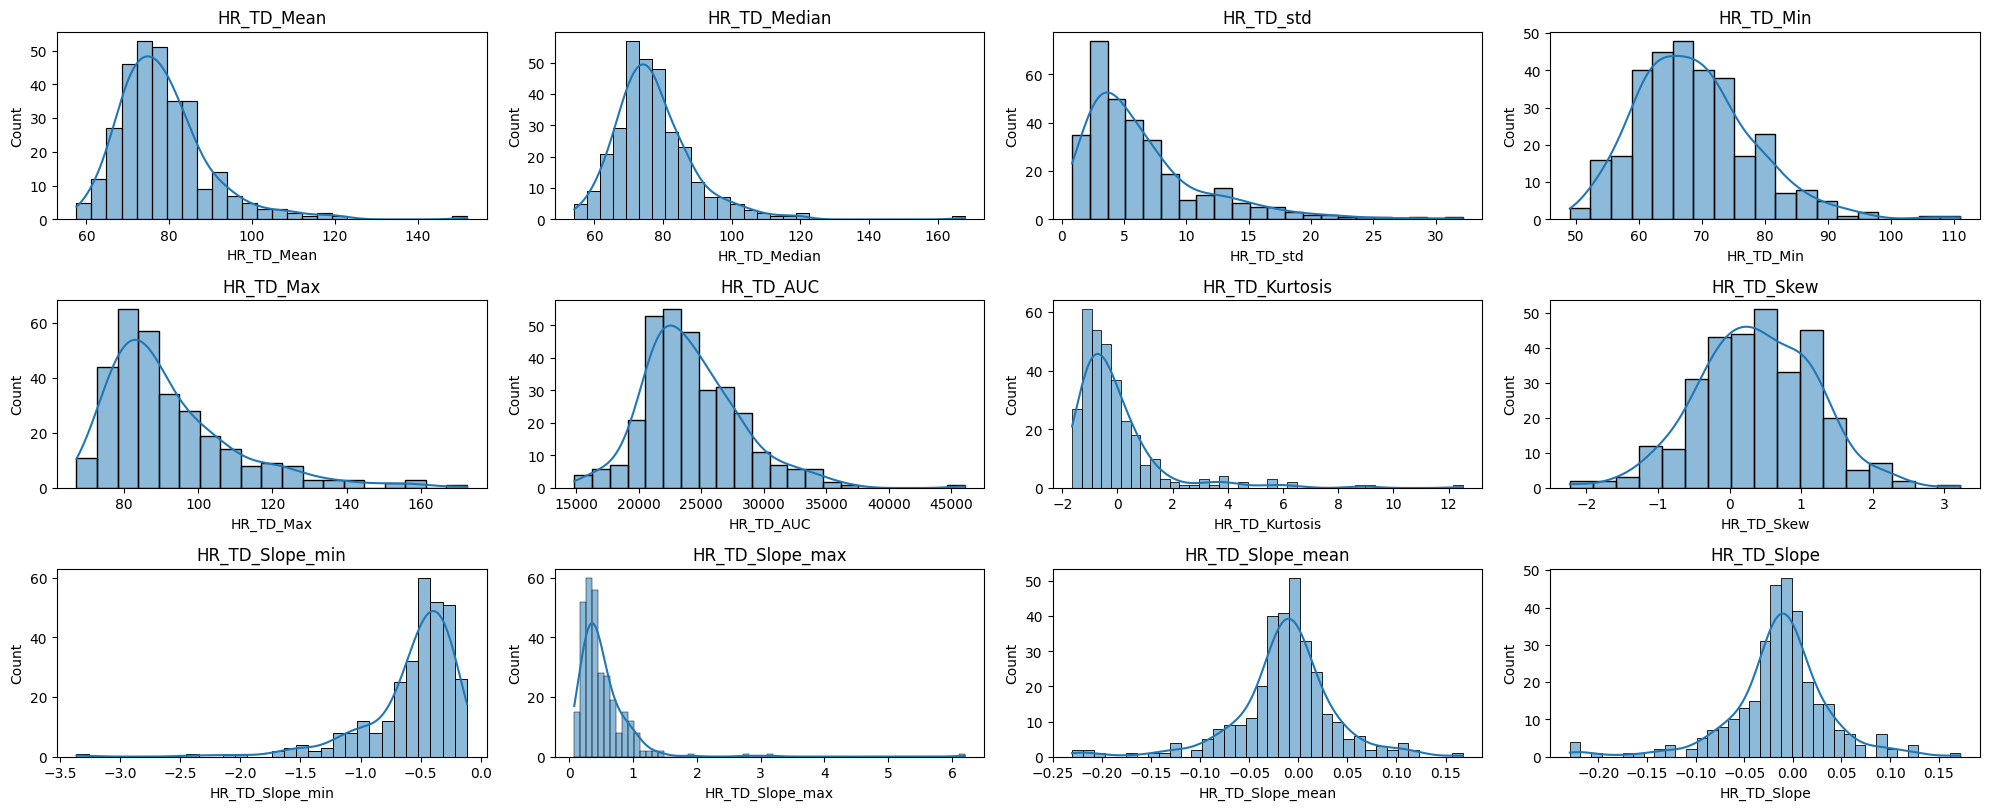

In [91]:
hist_subplots(heart_rate, id_columns)

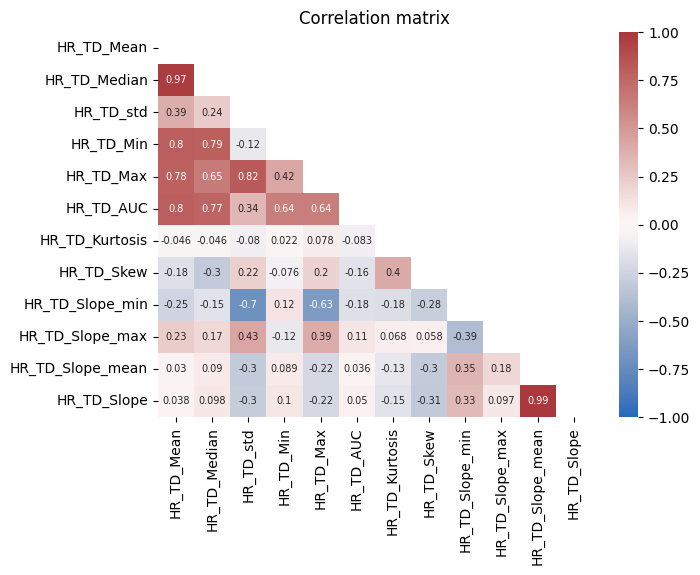

In [67]:
corr_heatmap(heart_rate, id_columns)

#### Temperature

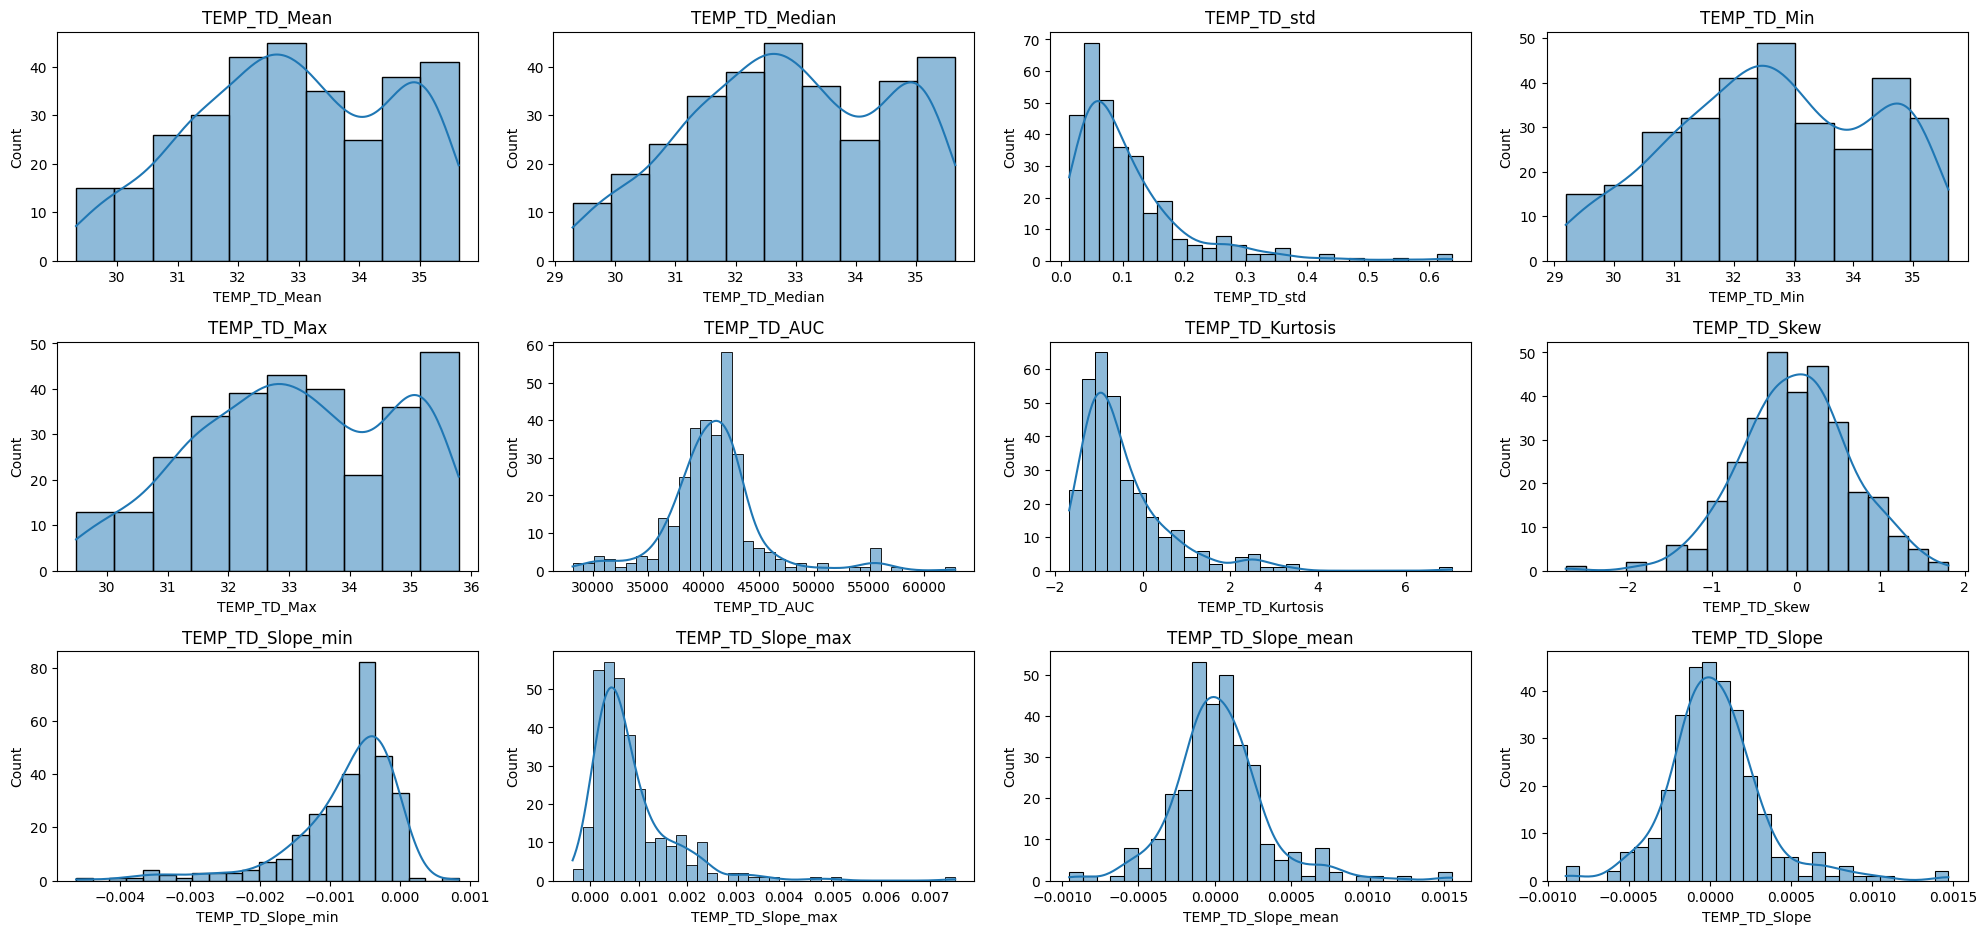

In [37]:
hist_subplots(temperature, id_columns)

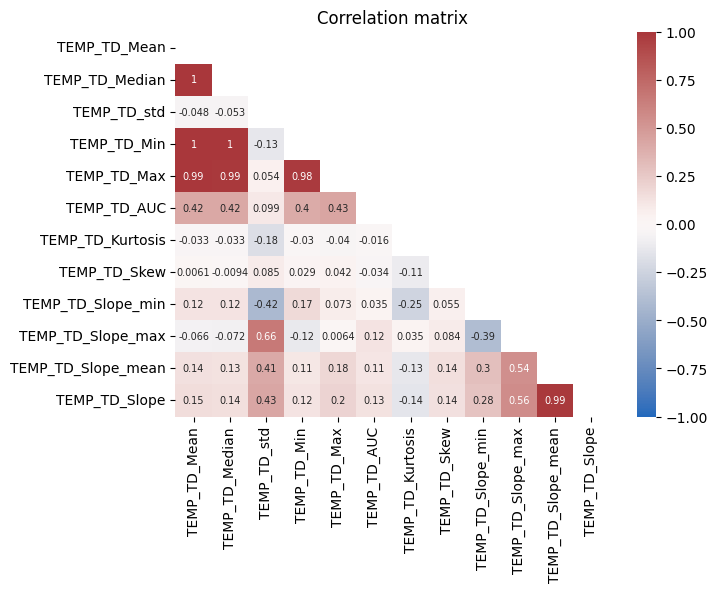

In [68]:
corr_heatmap(temperature, id_columns)

#### EDA Phasic

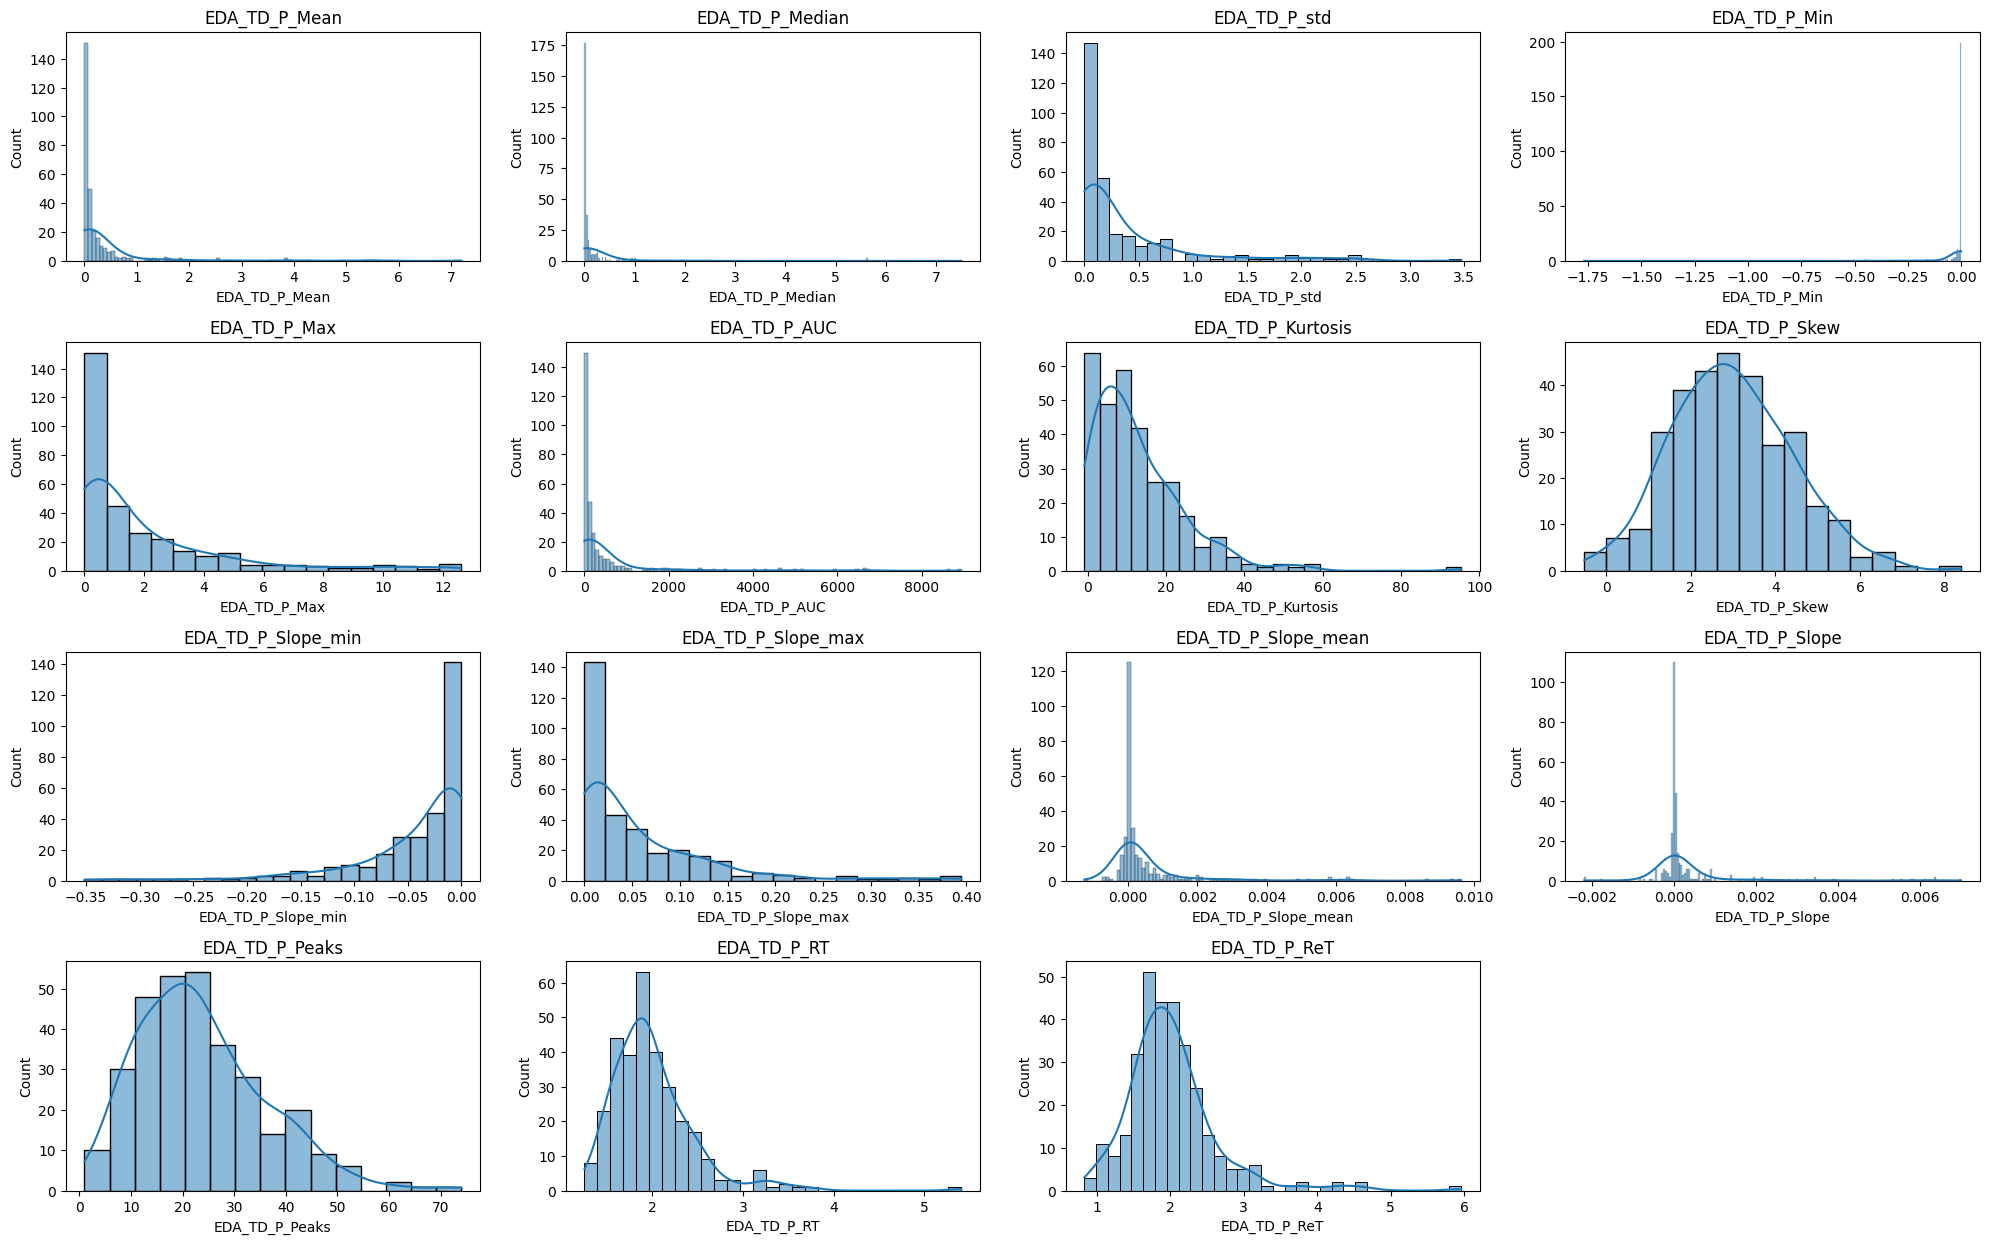

In [38]:
hist_subplots(eda_phasic, id_columns)

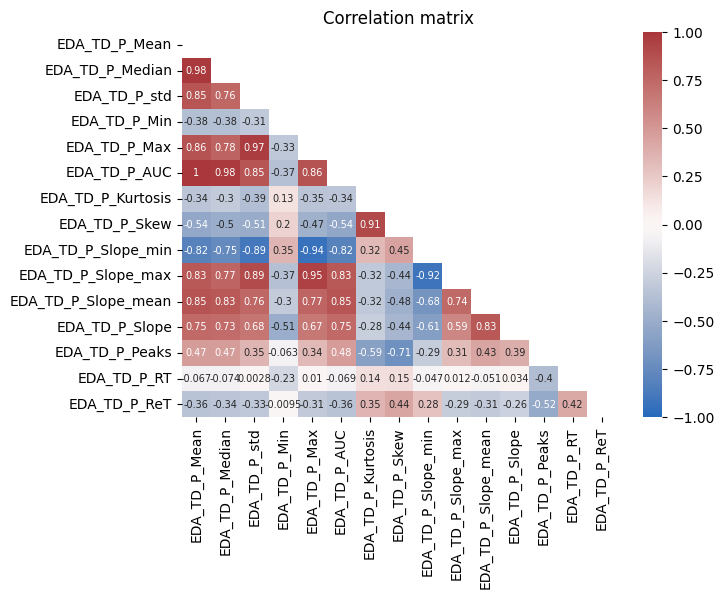

In [70]:
corr_heatmap(eda_phasic, id_columns)

#### EDA Tonic

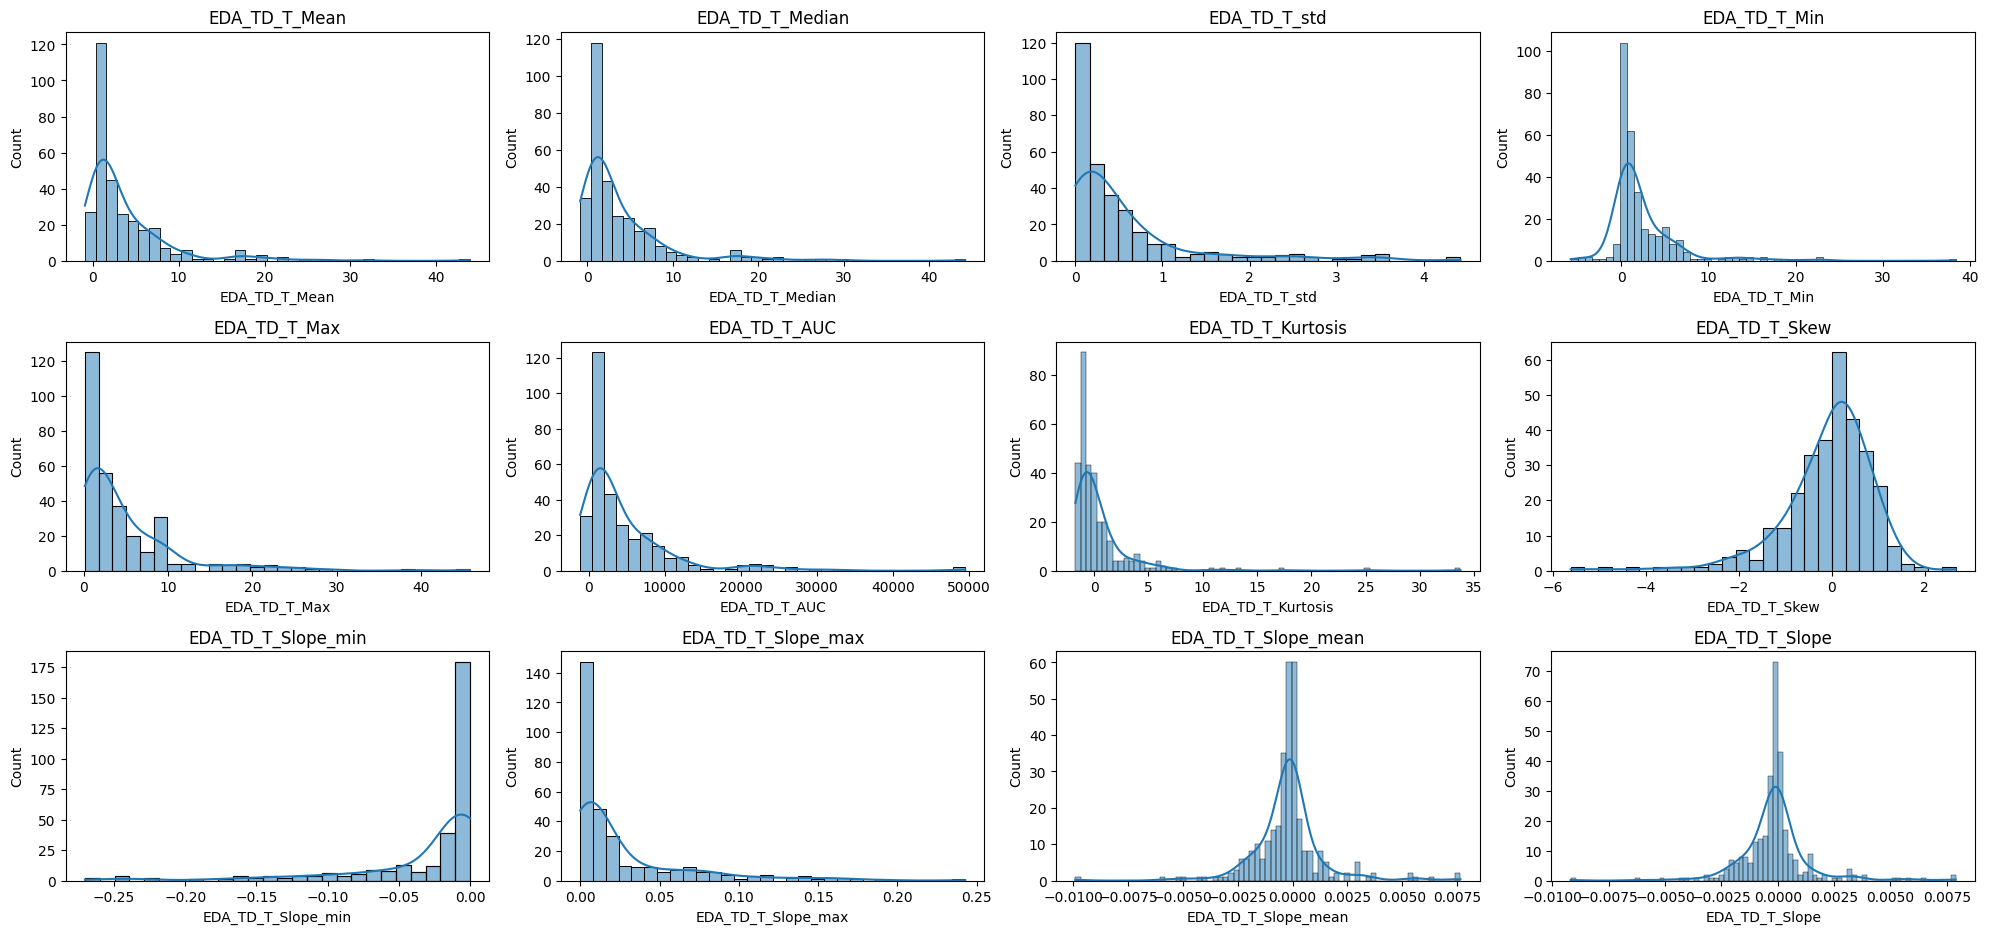

In [39]:
hist_subplots(eda_tonic, id_columns)

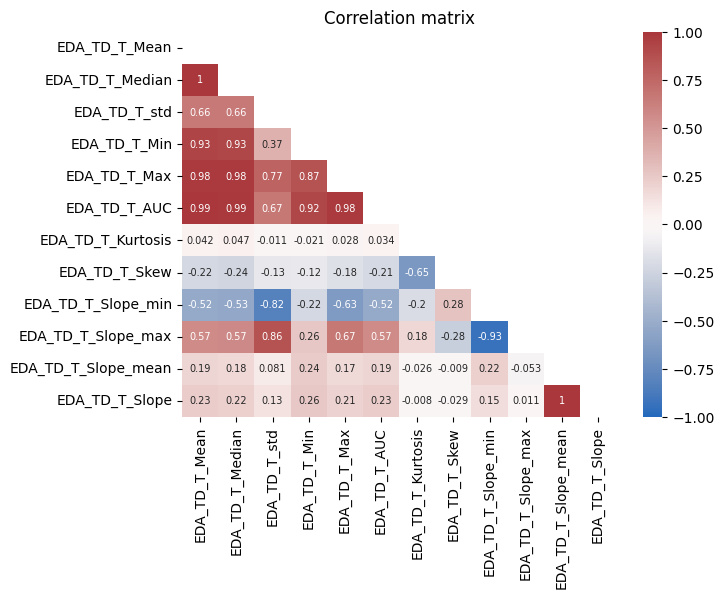

In [71]:
corr_heatmap(eda_tonic, id_columns)

## Questionnaire data

> **NOTE**
>
> - It does not seem like all 10 recorded emotions from the questionnaire are not in this dataset?

In [ ]:
questionnaire_features = [col for col in questionnaire.columns if col not in id_columns]

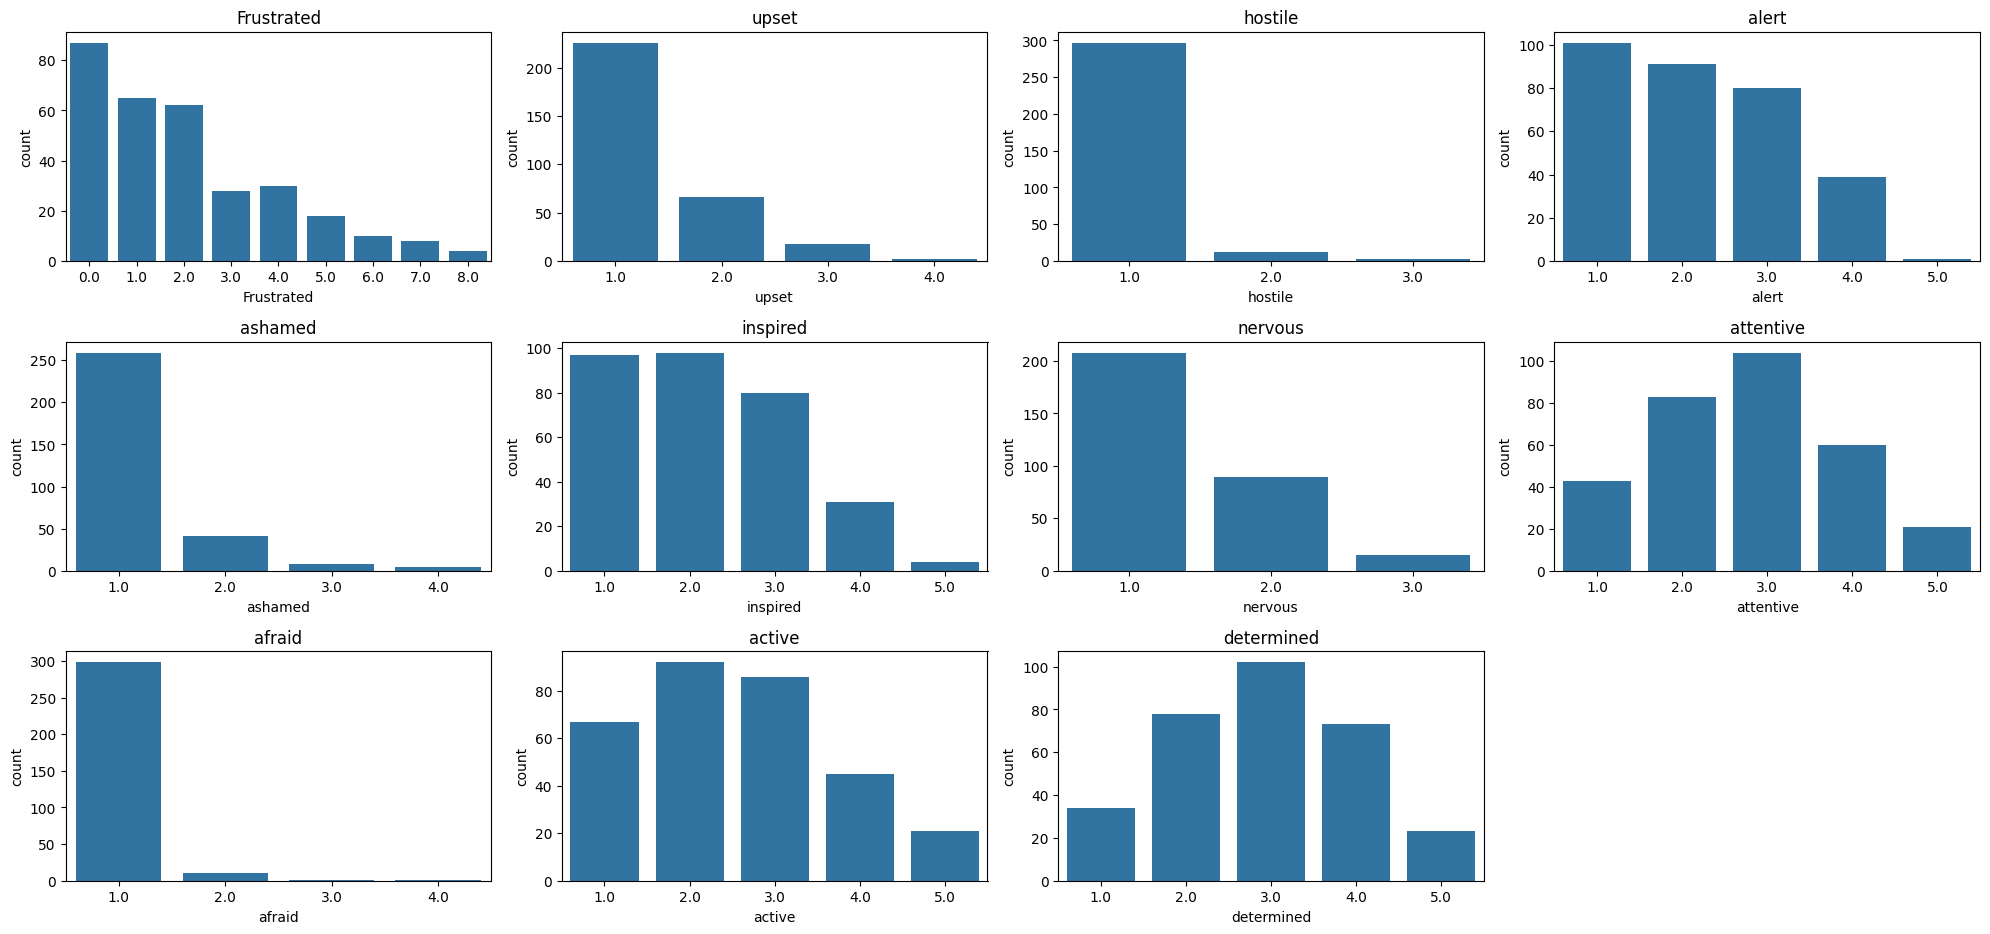

In [ ]:
# Plot distribution of each feature -- EXACT SAME from bia!!!
plt.figure(figsize=(20, 40))
for i, col in enumerate(questionnaire_features):
    plt.subplot(13, 4, i + 1)
    x = questionnaire[col].value_counts().index
    y = questionnaire[col].value_counts()
    sns.barplot(x=x, y=y)
    plt.title(col)
plt.tight_layout()
plt.show()

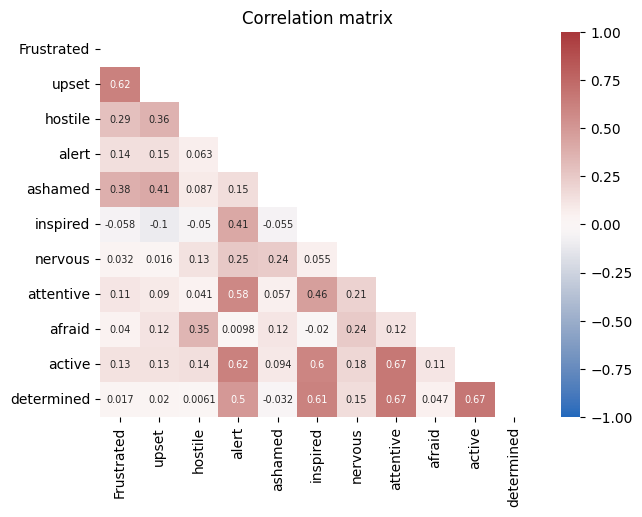

In [73]:
# Subset with only relevant features
questionnaire_subset = questionnaire[questionnaire_features]

# Triangular correlation matrix
mask = np.triu(np.ones_like(questionnaire_subset.corr(), dtype=np.bool))

# Correlation heatmap
plt.figure(figsize=(7, 5))
sns.heatmap(questionnaire_subset.corr(), mask=mask, annot=True, annot_kws={"size": 7}, cmap='vlag', center=0, vmin=-1, vmax=1)
plt.title('Correlation matrix')
plt.show()

# More in depth analysis

The current version uses all data, but we can also focus on differences within id_columns.

In [95]:
datasets = [heart_rate, temperature, eda_phasic, eda_tonic, questionnaire]
id_columns

['Round', 'Phase', 'Individual', 'Puzzler']

In [102]:
# Change scope of analysis HERE!!!
factor = 'Phase'
dataset = eda_phasic

> **Phase might be most relevant to us.**
> - Phase 1: Pre-Puzzle
> - Phase 2: During Puzzle
> - Phase 3: Post-Puzzle

> **ALSO NOTE**
> Within EDA signals, we would be more interested in 'eda_phasic' as it represents the changes in response to stimulus.
> Reference: "Tonic change refers to the smooth and gradual changes in the EDA response signal, which occur in the absence of stressing stimuli. On the other hand, the phasic change refers to the rapid/sudden changes in the EDA response."

phase3


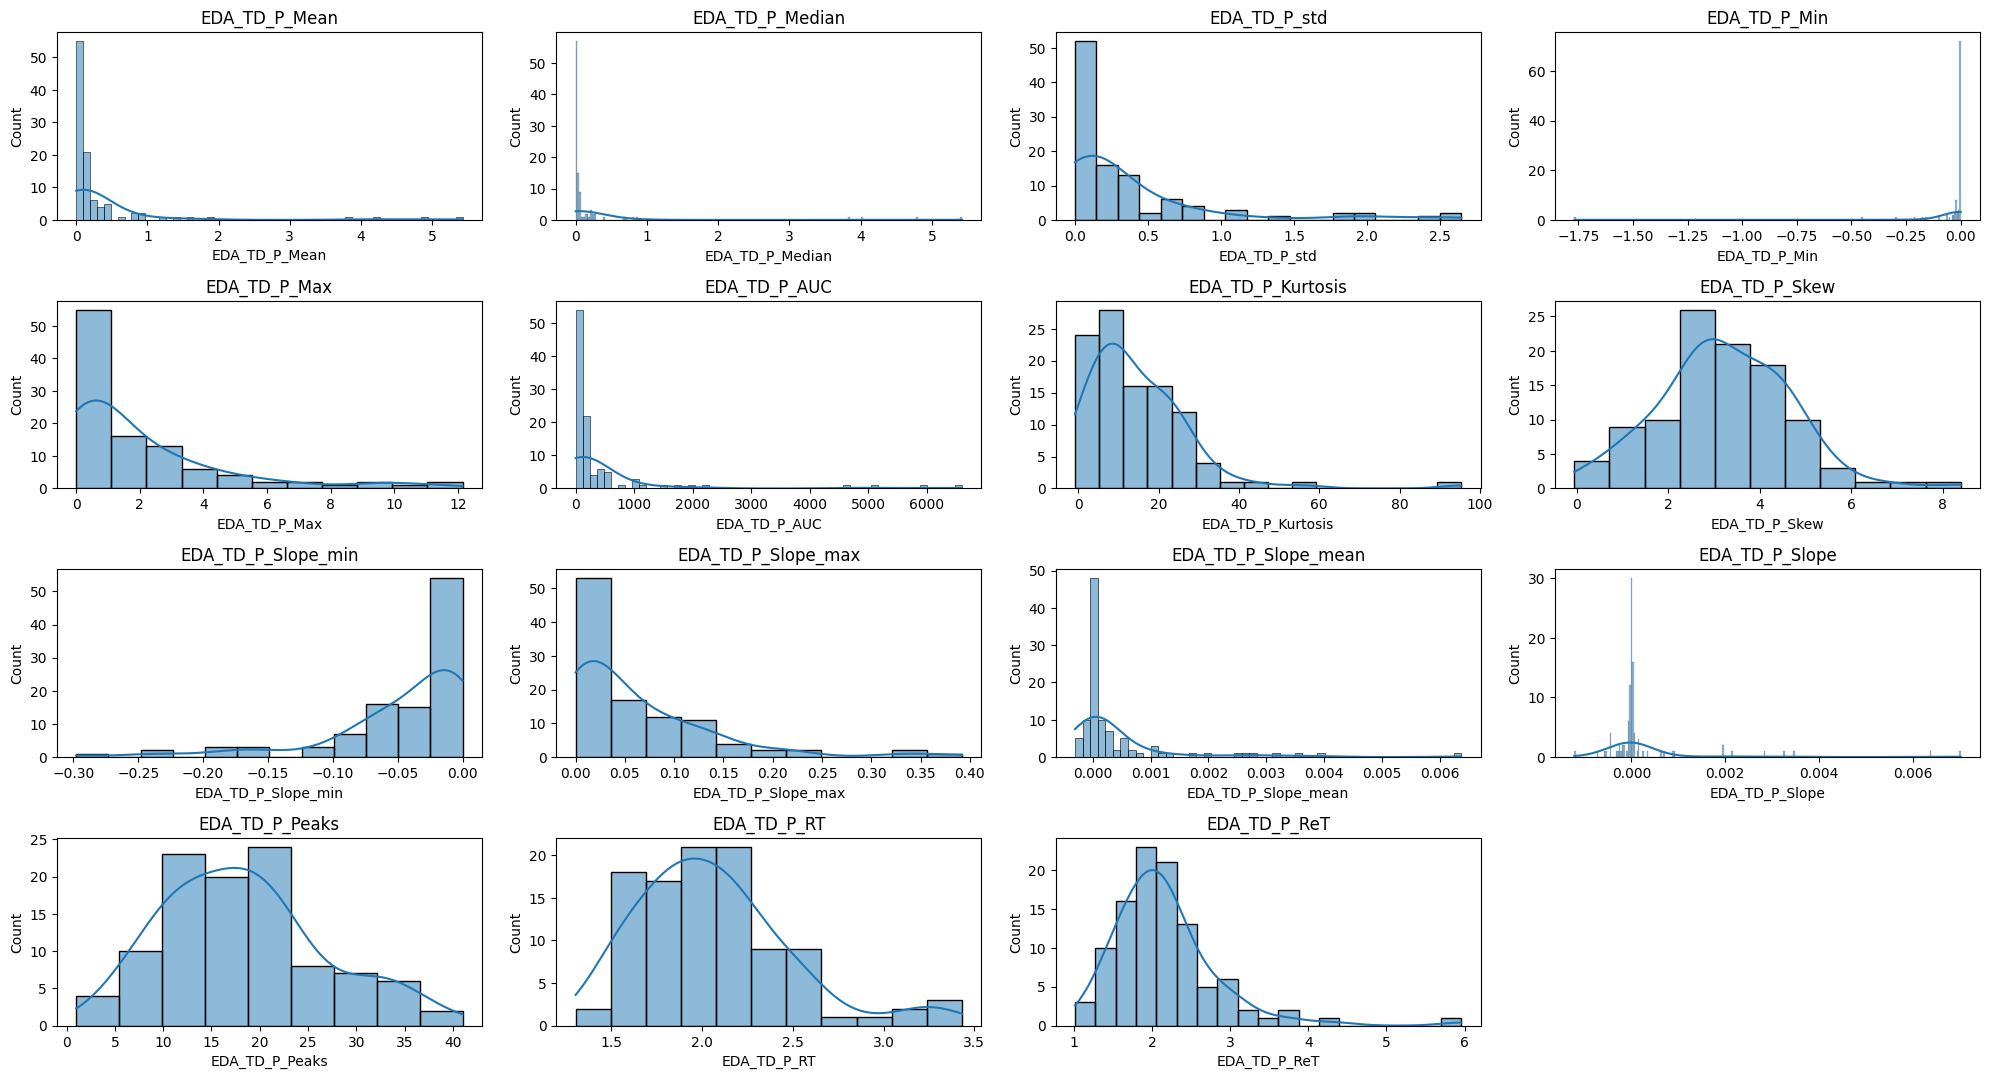

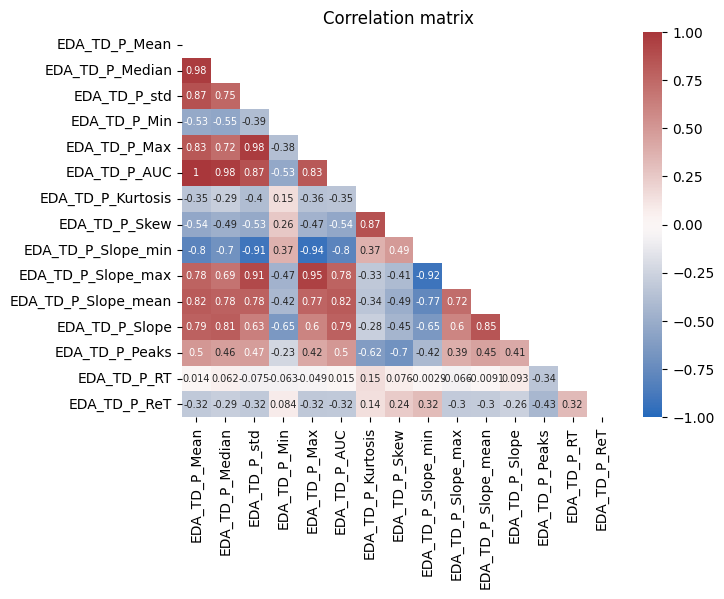

------------------------------------------------------------------------------------------------------------------------------------------------------
phase2


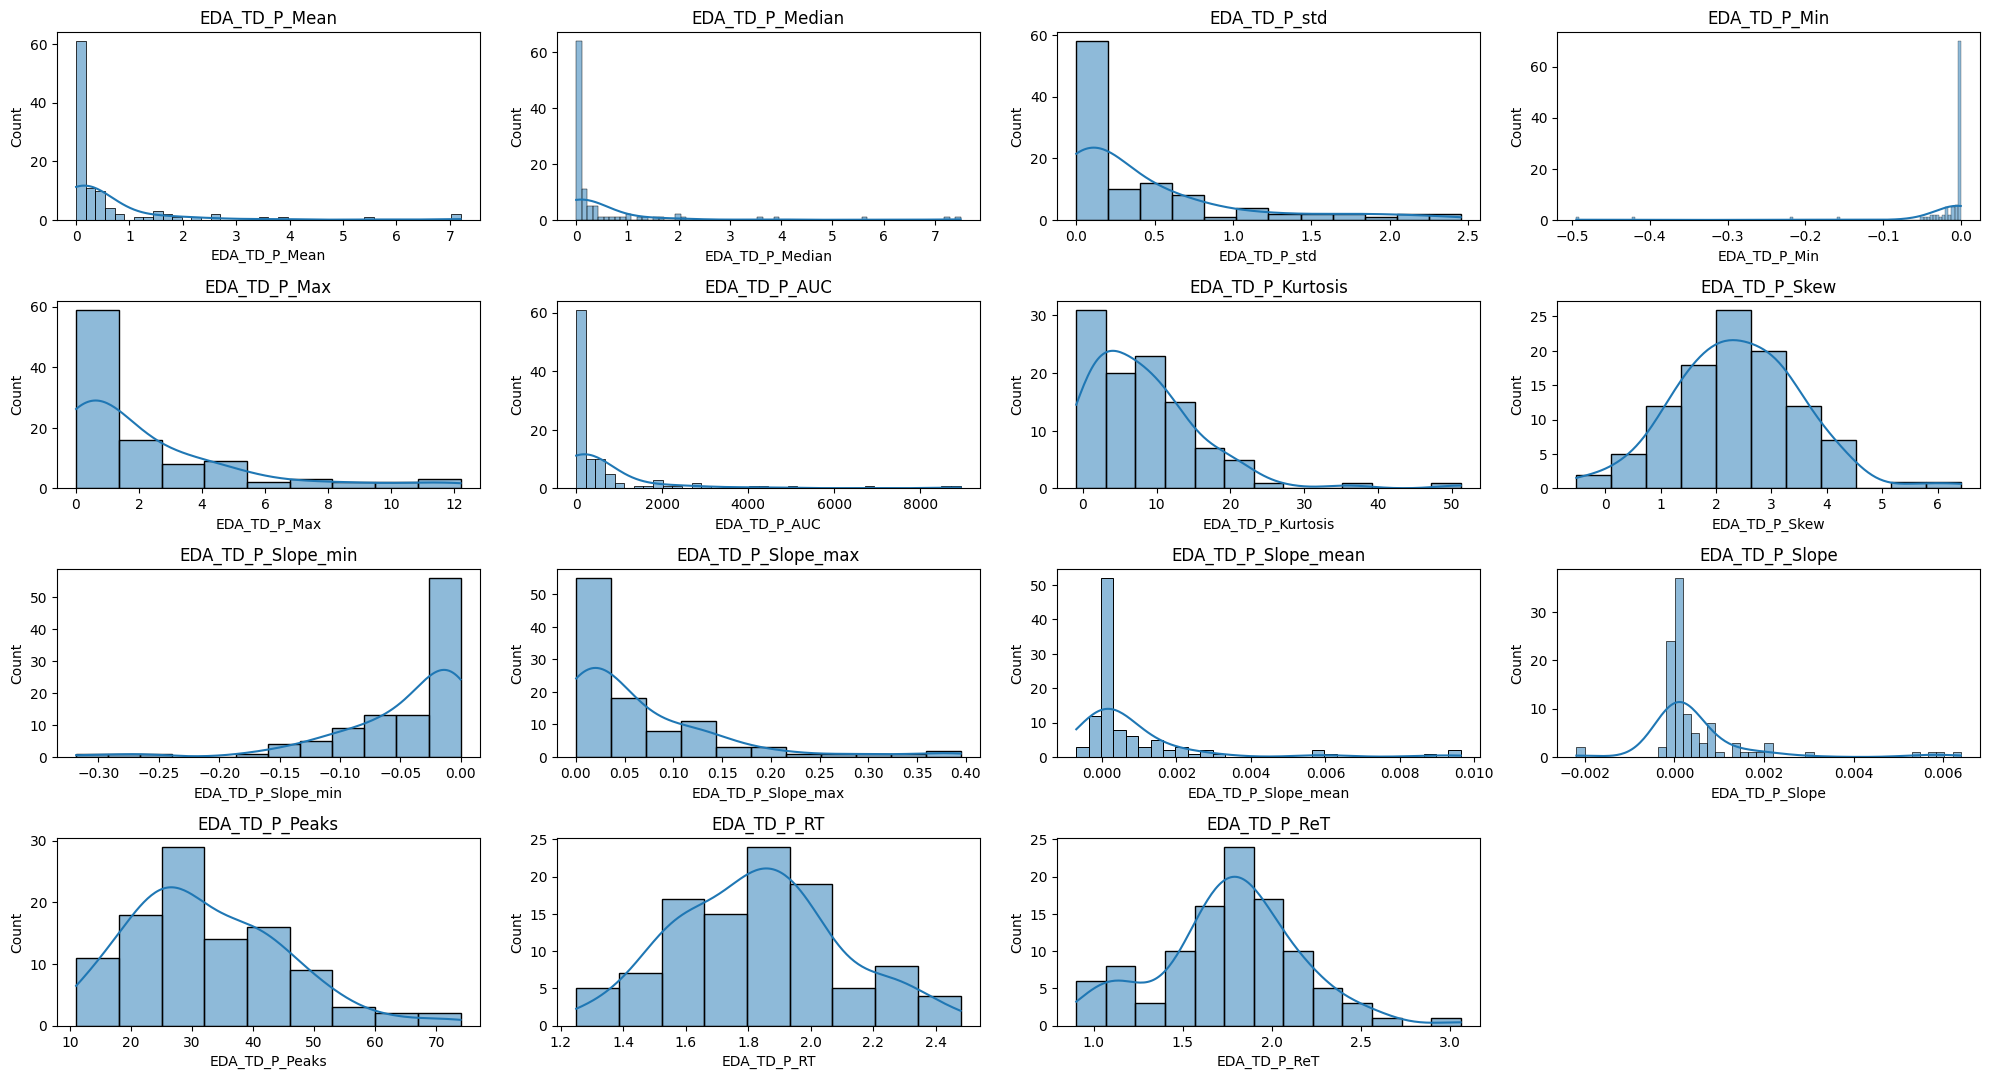

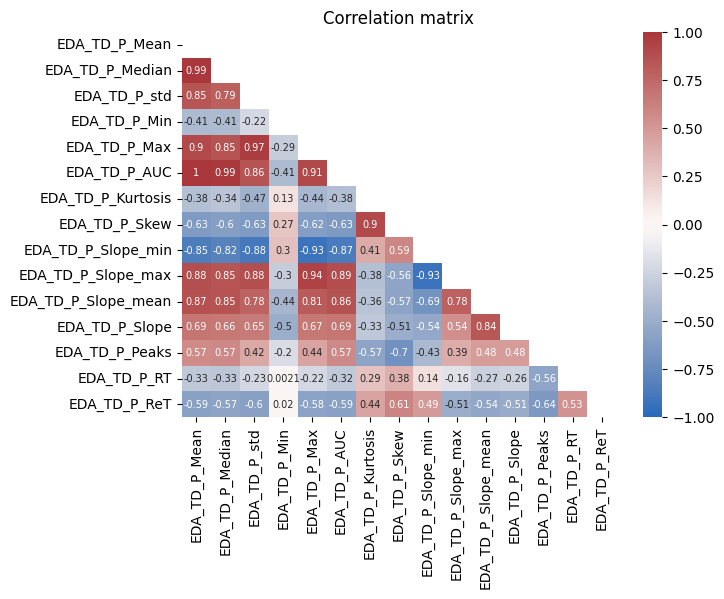

------------------------------------------------------------------------------------------------------------------------------------------------------
phase1


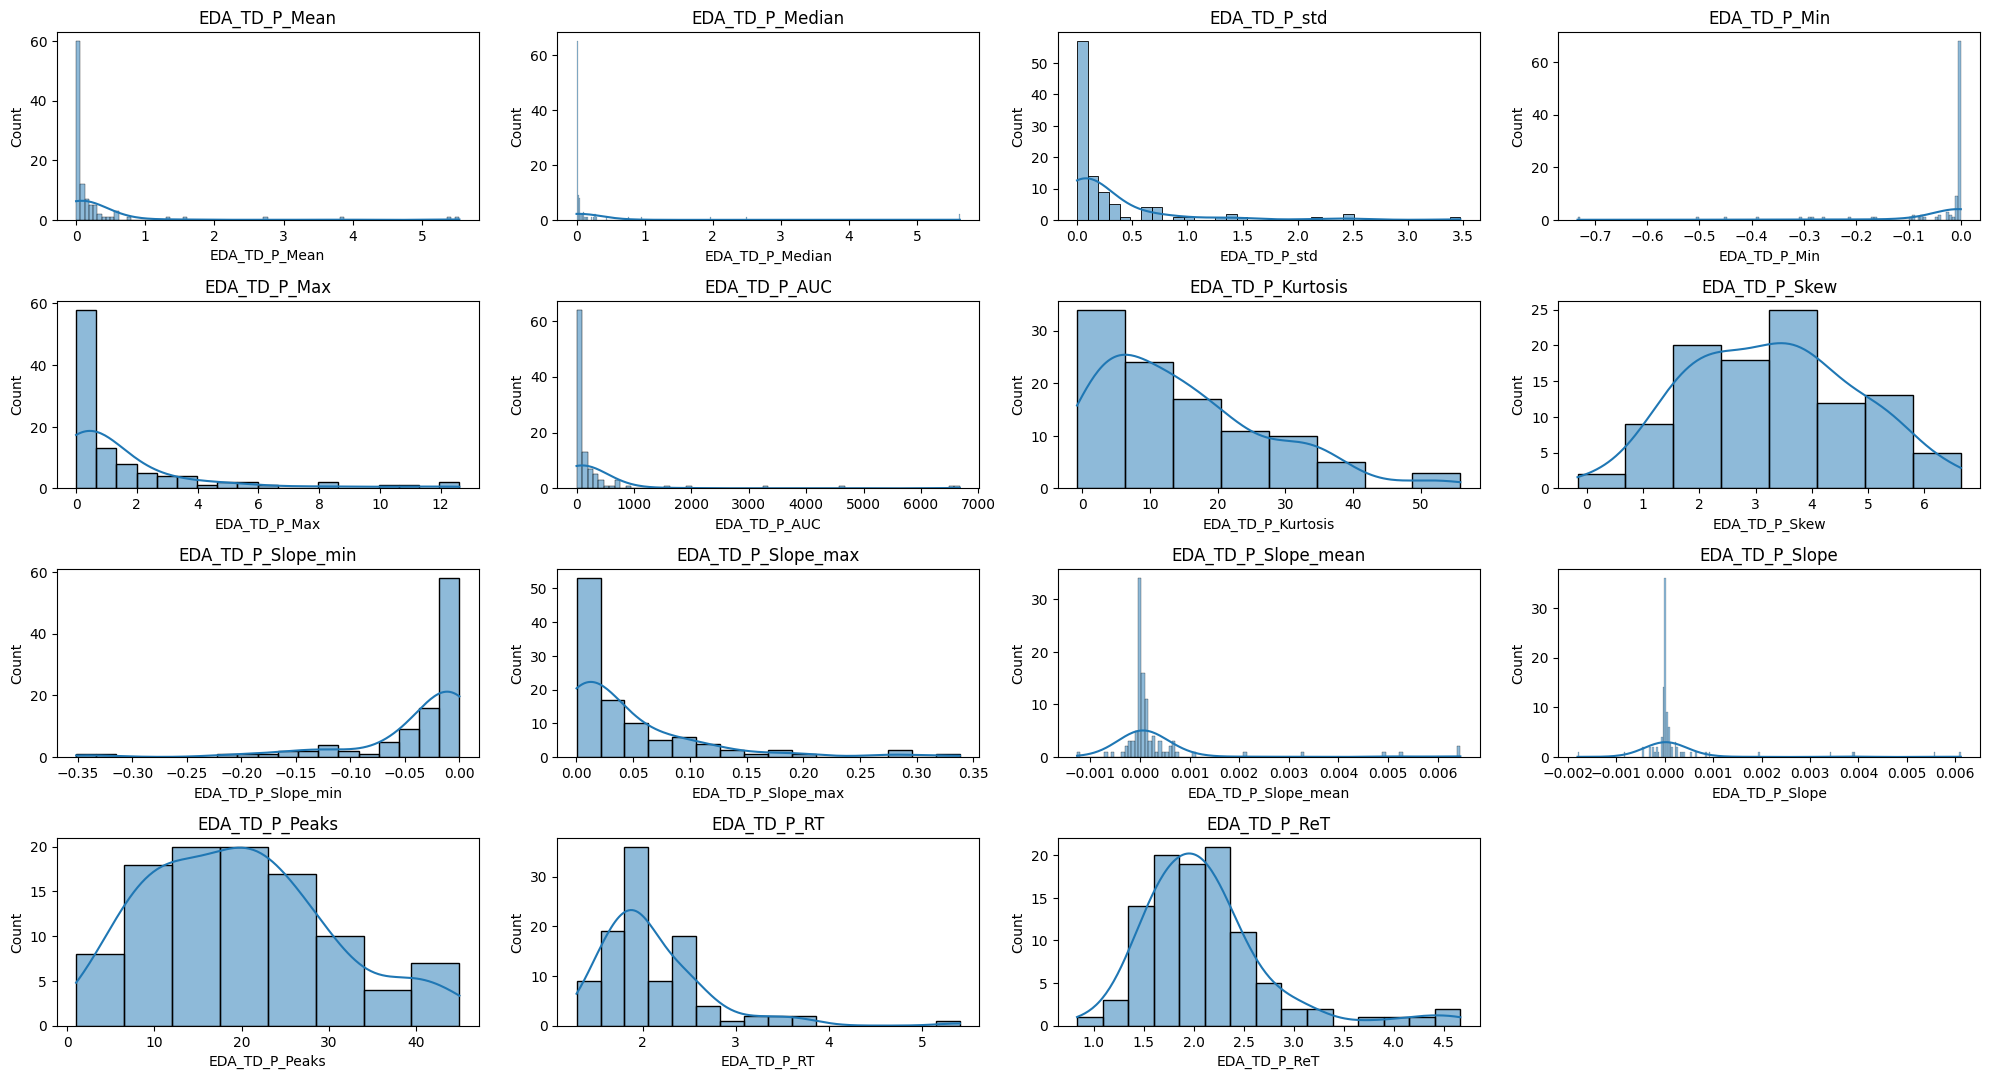

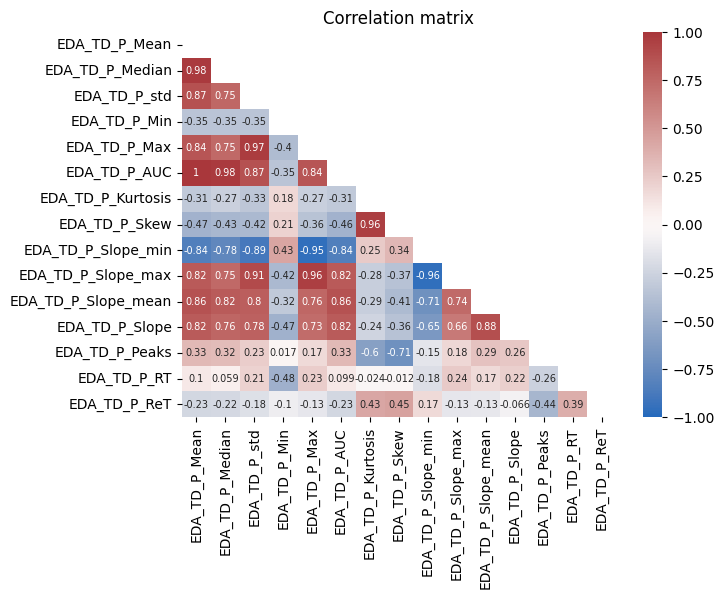

------------------------------------------------------------------------------------------------------------------------------------------------------


In [ ]:
for i, x in enumerate(dataset[factor].unique()):
    data_subset = dataset[dataset[factor] == x]
    print(f'{x}')
    hist_subplots(data_subset, id_columns)
    corr_heatmap(data_subset, id_columns)
    print('---'*50)